# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
#Imports
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics  
sns.set_style('whitegrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code
df_traffic = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',sep=';')
df_licenses = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',sep=';')


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code
df_traffic.head(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [7]:
df_traffic.tail(10)


,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
74,74,74,(2016),Qassim,No. of Casualties - Dead,397n,"26.1967063704, 43.3429998455"
75,75,75,(2016),Najran,No. of Casualties - Dead,173n,"18.4511003068, 46.8688495726"
76,76,76,(2016),Najran,No. of Casualties - Injured,706n,"18.4511003068, 46.8688495726"
77,77,77,(2016),Total,No. of Casualties - Dead,9031n,NaN
78,78,78,(2017),Makkah,No. of Accidents,145541n,"21.628962766, 41.2636898334"
79,79,79,(2017),Asir,No. of Casualties - Injured,2368n,"19.1387847401, 42.941470036"
80,80,80,(2017),Hail,No. of Casualties - Injured,773n,"27.400845724, 41.4406960508"
81,81,81,(2017),Al-Baaha,No. of Casualties - Dead,134n,"20.1484058503, 41.4665484892"
82,82,82,(2017),Al-Baaha,No. of Accidents,1414n,"20.1484058503, 41.4665484892"
83,83,83,(2017),Al-Baaha,No. of Casualties - Injured,1007n,"20.1484058503, 41.4665484892"


In [8]:
df_licenses.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [9]:
df_licenses.tail(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
340,340,(2004),Assir,17947n,"19.1387847401, 42.941470036"
341,341,(2009),Assir,21582n,"19.1387847401, 42.941470036"
342,342,(2016),Tabouk,13610n,"27.90165499, 37.2598581394"
343,343,(2012),Tabouk,11391n,"27.90165499, 37.2598581394"
344,344,(1999),Tabouk,5298n,"27.90165499, 37.2598581394"
345,345,(2000),Tabouk,8473n,"27.90165499, 37.2598581394"
346,346,(2006),Tabouk,8259n,"27.90165499, 37.2598581394"
347,347,(2013),Hail,9731n,"27.400845724, 41.4406960508"
348,348,(1997),Hail,6606n,"27.400845724, 41.4406960508"
349,349,(1999),Hail,3139n,"27.400845724, 41.4406960508"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

 The first dataframe describe the indicator issued based on year and the region it happend 
 and the second dataframe contain the licenses issued based on year and the region.

#### 4a. How complete is the data?

Investigate missing values etc.

In [10]:
#Code
df_traffic.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [11]:
df_licenses.isnull().sum()

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [12]:
#Code
#minimum +maximum values
print(df_traffic.min())
print(df_traffic.max())

Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object
Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object


In [13]:
#minimum +maximum values
print(df_licenses.min())
print(df_licenses.max())

Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object
Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [14]:
#code
#data types
print(df_traffic.dtypes)

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object


In [15]:
print(df_licenses.dtypes)

Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

yes . The value , year ,Driving Liceses should be an 'int' and geo_point_2d should be a 'float'.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [4]:
#code
# convert numerical columns to an appropriate numeric type
df_traffic['Value'] = df_traffic["Value"].apply(lambda x:x.strip("n"))
df_traffic['Year'] = df_traffic["Year"].apply(lambda x:x.strip("()"))
df_traffic

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394"
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508"
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508"
...,...,...,...,...,...,...,...
79,79,79,2017,Asir,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036"
80,80,80,2017,Hail,No. of Casualties - Injured,773,"27.400845724, 41.4406960508"
81,81,81,2017,Al-Baaha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892"
82,82,82,2017,Al-Baaha,No. of Accidents,1414,"20.1484058503, 41.4665484892"


In [5]:
# convert numerical columns to an appropriate numeric type
df_traffic['Value']=df_traffic['Value'].apply(pd.to_numeric)
print(df_traffic['Value'].dtypes)
df_traffic['Year']=df_traffic['Year'].apply(pd.to_numeric)
print(df_traffic['Year'].dtypes)

int64
int64


In [6]:
df_licenses['Driving Liceses'] = df_licenses["Driving Liceses"].apply(lambda x:x.strip("n"))
df_licenses['Year'] = df_licenses["Year"].apply(lambda x:x.strip("()"))
df_licenses

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334"
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334"
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334"
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334"
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334"
...,...,...,...,...,...
345,345,2000,Tabouk,8473,"27.90165499, 37.2598581394"
346,346,2006,Tabouk,8259,"27.90165499, 37.2598581394"
347,347,2013,Hail,9731,"27.400845724, 41.4406960508"
348,348,1997,Hail,6606,"27.400845724, 41.4406960508"


In [7]:
df_licenses['Driving Liceses']=df_licenses['Driving Liceses'].apply(pd.to_numeric)
df_licenses['Driving Liceses'].dtypes

dtype('int64')

In [8]:
df_licenses['Year']=df_licenses['Year'].apply(pd.to_numeric)
df_licenses['Year'].dtypes

dtype('int64')

- Make new columns `x` and `y` using `geo_point_2d`

In [9]:
#code
col_traffic_split = df_traffic["geo_point_2d"].str.split(',', n = 0, expand = True) 

df_traffic["x"]=  col_traffic_split[0] 
df_traffic["y"]=  col_traffic_split[1] 
df_traffic

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.2883307307,50.1478302439
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.90165499,37.2598581394
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400845724,41.4406960508
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400845724,41.4406960508
...,...,...,...,...,...,...,...,...,...
79,79,79,2017,Asir,No. of Casualties - Injured,2368,"19.1387847401, 42.941470036",19.1387847401,42.941470036
80,80,80,2017,Hail,No. of Casualties - Injured,773,"27.400845724, 41.4406960508",27.400845724,41.4406960508
81,81,81,2017,Al-Baaha,No. of Casualties - Dead,134,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892
82,82,82,2017,Al-Baaha,No. of Accidents,1414,"20.1484058503, 41.4665484892",20.1484058503,41.4665484892


In [12]:
col_licenses_split = df_licenses["geo_point_2d"].str.split(',', n = 0, expand = True)

df_licenses["x"]=col_licenses_split[0] 
df_licenses["y"]=col_licenses_split[1] 
df_licenses

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628962766,41.2636898334
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628962766,41.2636898334
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628962766,41.2636898334
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628962766,41.2636898334
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628962766,41.2636898334
...,...,...,...,...,...,...,...
345,345,2000,Tabouk,8473,"27.90165499, 37.2598581394",27.90165499,37.2598581394
346,346,2006,Tabouk,8259,"27.90165499, 37.2598581394",27.90165499,37.2598581394
347,347,2013,Hail,9731,"27.400845724, 41.4406960508",27.400845724,41.4406960508
348,348,1997,Hail,6606,"27.400845724, 41.4406960508",27.400845724,41.4406960508


- Fix any individual values preventing other columns from being the appropriate type.

In [13]:
#code change the  type of the columns
df_traffic['x']=df_traffic['x'].astype(float)
df_traffic['y']=df_traffic['y'].astype(float)
df_licenses['x']=df_licenses['x'].astype(float)
df_licenses['y']=df_licenses['y'].astype(float)
print(df_traffic.info())
print(df_licenses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 9 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null int64
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null int64
geo_point_2d    78 non-null object
x               78 non-null float64
y               78 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 6.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null int64
Administritive Area    350 non-null object
Driving Liceses        350 non-null int64
geo_point_2d           325 non-null object
x                      325 non-null float64
y                      325 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 19.3+ KB
None


In [14]:
del df_traffic['Unnamed: 0.1']
del df_traffic['Unnamed: 0']
del df_traffic['geo_point_2d']
df_traffic

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696
...,...,...,...,...,...,...
79,2017,Asir,No. of Casualties - Injured,2368,19.138785,42.941470
80,2017,Hail,No. of Casualties - Injured,773,27.400846,41.440696
81,2017,Al-Baaha,No. of Casualties - Dead,134,20.148406,41.466548
82,2017,Al-Baaha,No. of Accidents,1414,20.148406,41.466548


In [15]:
# cleaning data: remove  the columns
del df_licenses['Unnamed: 0']
del df_licenses ['geo_point_2d']
df_licenses

,Year,Administritive Area,Driving Liceses,x,y
0,2012,Makkah,143954,21.628963,41.263690
1,1994,Makkah,75349,21.628963,41.263690
2,1998,Makkah,86082,21.628963,41.263690
3,2004,Makkah,86636,21.628963,41.263690
4,2005,Makkah,65099,21.628963,41.263690
...,...,...,...,...,...
345,2000,Tabouk,8473,27.901655,37.259858
346,2006,Tabouk,8259,27.901655,37.259858
347,2013,Hail,9731,27.400846,41.440696
348,1997,Hail,6606,27.400846,41.440696


In [16]:
# replace the name in Region in data traffic that will help me to marg the data 
df_traffic['Region']=df_traffic['Region'].str.replace('Qassim','Al-Qaseem')
df_traffic['Region']=df_traffic['Region'].str.replace('Al-Baaha','Al-Baha')
df_traffic['Region']=df_traffic['Region'].str.replace('Eastern Region','Eastern')
df_traffic['Region']=df_traffic['Region'].str.replace('Asir','Assir')
df_traffic.head(10)

,Year,Region,Indicator,Value,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696
5,2016,Northern Boarder,No. of Casualties - Dead,193,30.197075,41.817119
6,2017,Jazan,No. of Accidents,22161,17.207231,42.652581
7,2017,Al-Jouf,No. of Accidents,10469,29.967745,39.557037
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN
9,2016,Northern Boarder,No. of Casualties - Injured,631,30.197075,41.817119


- Finish your data modifications by making sure the columns are now typed appropriately.

In [18]:
#code

print(df_traffic.dtypes)
print(df_licenses.dtypes)

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object
Year                     int64
Administritive Area     object
Driving Liceses          int64
x                      float64
y                      float64
dtype: object


- Display the data types again to confirm they are correct.

In [19]:
#Code:
display(df_traffic.dtypes)
display(df_licenses.dtypes)

Year           int64
Region        object
Indicator     object
Value          int64
x            float64
y            float64
dtype: object

Year                     int64
Administritive Area     object
Driving Liceses          int64
x                      float64
y                      float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [20]:
#code
#Column names be all lowercase
traffic_accidents=df_traffic.rename(columns={
'Year':'year',
'Region':'region',
'Indicator':'indicator',
'Value' :'value',
'x':'latitude',
'y':'longitude'  
} ,inplace=True)
df_traffic.head()

,year,region,indicator,value,latitude,longitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [21]:

#Column names be all lowercase
driving_licenses=df_licenses.rename(columns={
'Year':'year',
'Administritive Area':'region',
'Driving Liceses':'driving_licese',
'x':'latitude',
'y':'longitude'  
} ,inplace=True)    
df_licenses.head()

,year,region,driving_licese,latitude,longitude
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|integr|Driving_Licenses/Traffic_Accidents|the year is describe the driver's license was issued and accidents happen|
|region|object|Driving_Licenses/Traffic_Accidents|the region describe the area that driving license was issued and accidents happen|
|driving_Licenses|intger|Driving_Licenses|describe the number of driving licenses issued |
|indicator|object|Traffic_Accidents|the number of indicator describe.|
|geo_point_2d|object|Traffic_Accidents|Region location coordinator|
|x|float|Driving_Licenses|x coordinator for region|
|y|float|Driving_Licenses|y coordinator for region|

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [24]:
#code
#drop the Total from the Region & show the unique values to make suer the total remove
df_traffic=df_traffic[df_traffic.region !="Total"]
print(df_traffic['region'].unique (),'\n')


df_licenses=df_licenses[df_licenses.region !="Total"]
print(df_licenses['region'].unique())



['Makkah' 'Eastern' 'Tabouk' 'Hail' 'Northern Boarder' 'Jazan' 'Al-Jouf'
 'Al-Baha' 'Riyadh' 'Madinah' 'Al-Qaseem' 'Najran' 'Assir'] 

['Makkah' 'Madinah' 'Al-Qaseem' 'Eastern' 'Assir' 'Tabouk' 'Hail'
 'Northern Boarder' 'Jazan' 'Najran' 'Al-Baha' 'Al-Jouf' 'Riyadh']


In [25]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 83
Data columns (total 6 columns):
year         78 non-null int64
region       78 non-null object
indicator    78 non-null object
value        78 non-null int64
latitude     78 non-null float64
longitude    78 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.3+ KB


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

The License data and Traffic accident data is long ,because each subject(year ,region )will have repeated data in multiple rows .

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [29]:

table_pivot = pd.pivot_table(df_traffic, values ='value', index=['year','region'],
                         columns ='indicator').reset_index().rename_axis(None, axis=1)


In [30]:
table_pivot.columns=['year','region','total_of_accidents','total_of_dead','total_of_injured']
table_pivot.head()

,year,region,total_of_accidents,total_of_dead,total_of_injured
0,2016,Al-Baha,3618,185,1227
1,2016,Al-Jouf,10212,245,920
2,2016,Al-Qaseem,25664,397,1513
3,2016,Assir,32684,983,2541
4,2016,Eastern,101619,1113,4893


In [31]:
#code
table_pivot.describe()

,year,total_of_accidents,total_of_dead,total_of_injured
count,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462
std,0.509902,46493.705035,549.783381,2922.641127
min,2016.000000,1414.000000,112.000000,374.000000
25%,2016.000000,10276.250000,241.250000,923.000000
50%,2016.500000,16050.500000,415.500000,1618.500000
75%,2017.000000,30981.250000,929.250000,3784.000000
max,2017.000000,145541.000000,2243.000000,12383.000000


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [41]:
marge_inner=pd.merge(table_pivot, df_licenses, how='inner', left_on=['year','region'], right_on=['year','region'])
marge_inner

,year,region,total_of_accidents,total_of_dead,total_of_injured,driving_licese,latitude,longitude
0,2016,Al-Baha,3618,185,1227,4614,20.148406,41.466548
1,2016,Al-Jouf,10212,245,920,9371,29.967745,39.557037
2,2016,Al-Qaseem,25664,397,1513,9180,26.196706,43.343000
3,2016,Assir,32684,983,2541,41367,19.138785,42.941470
4,2016,Eastern,101619,1113,4893,142307,23.288331,50.147830
5,2016,Hail,10199,299,932,54507,27.400846,41.440696
6,2016,Jazan,25873,514,2259,11504,17.207231,42.652581
7,2016,Madinah,14475,822,4184,24540,24.927535,39.491824
8,2016,Makkah,134838,2243,12383,136055,21.628963,41.263690
9,2016,Najran,3235,173,706,2153,18.451100,46.868850


In [33]:
#code
marge_df=pd.merge(table_pivot, df_licenses, how='outer', left_on=['year','region'], right_on=['year','region'],sort='year')
marge_df

,year,region,total_of_accidents,total_of_dead,total_of_injured,driving_licese,latitude,longitude
0,1993,Al-Baha,NaN,NaN,NaN,3270,20.148406,41.466548
1,1993,Al-Jouf,NaN,NaN,NaN,2884,29.967745,39.557037
2,1993,Al-Qaseem,NaN,NaN,NaN,73618,26.196706,43.343000
3,1993,Assir,NaN,NaN,NaN,6226,19.138785,42.941470
4,1993,Eastern,NaN,NaN,NaN,9964,23.288331,50.147830
...,...,...,...,...,...,...,...,...
320,2017,Makkah,145541.0,1641.0,10623.0,142487,21.628963,41.263690
321,2017,Najran,3193.0,194.0,766.0,13825,18.451100,46.868850
322,2017,Northern Boarder,11540.0,112.0,374.0,5280,30.197075,41.817119
323,2017,Riyadh,99925.0,1399.0,4540.0,495307,23.081434,45.585751


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [34]:
#code
marge_df.to_csv('./combined_datasets.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [35]:
marge_df['total_of_accidents']=marge_df['total_of_accidents'].replace(np.nan, 0)
marge_df['total_of_injured']=marge_df['total_of_injured'].replace(np.nan, 0)
marge_df['total_of_dead']=marge_df['total_of_dead'].replace(np.nan, 0)
marge_df['driving_licese']=marge_df['driving_licese'].replace(np.nan, 0)
marge_df['year']==marge_df['year'].replace(np.nan, 0)

0      True
1      True
2      True
3      True
4      True
       ... 
320    True
321    True
322    True
323    True
324    True
Name: year, Length: 325, dtype: bool

In [36]:
marge_df['total_of_accidents']=marge_df['total_of_accidents'].astype(int)
marge_df['total_of_injured']=marge_df['total_of_injured'].astype(int)
marge_df['total_of_dead']=marge_df['total_of_dead'].astype(int)
marge_df['driving_licese']=marge_df['driving_licese'].astype(int)
marge_df.dtypes

year                    int64
region                 object
total_of_accidents      int32
total_of_dead           int32
total_of_injured        int32
driving_licese          int32
latitude              float64
longitude             float64
dtype: object

In [37]:
#Code:we can ues marge_df.describe().T
marge_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
total_of_accidents,325.0,3058.055385,16573.219899,0.000000,0.000000,0.000000,0.000000,145541.000000
total_of_dead,325.0,50.830769,230.494461,0.000000,0.000000,0.000000,0.000000,2243.000000
total_of_injured,325.0,219.443077,1102.082874,0.000000,0.000000,0.000000,0.000000,12383.000000
driving_licese,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
latitude,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075
longitude,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830


In [38]:
marge_inner.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
total_of_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
total_of_dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
total_of_injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
driving_licese,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
latitude,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
longitude,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [44]:
#code

import math
def mean(values):#  
    return sum(values)/len(values)
def standDev(values):
    lenght=len(values)-1 # عشان الطول حق الداله ياخذ صفر
    m=mean(values)
    total_sum=0# عشان لودخلن الوب يعطين صفر ويضيف عليها توتل كل مرا ويخذ فيه فلازم نصفر 
    for i in range(lenght):
        total_sum+=(values[i]-m)**2
        under_root=total_sum/lenght
    return math.sqrt(under_root)

st=marge_inner[('driving_licese')]
stand_Dev=standDev(st)
print('Standard Deviation of Driving Licese:',stand_Dev)


st=marge_inner[('total_of_dead')]
stand_Dev=standDev(st)
print('Standard Deviation of Total of Dead:',stand_Dev)

st=marge_inner[('total_of_injured')]
stand_Dev=standDev(st)
print('Standard Deviation of Total of Injured:', stand_Dev)

st=marge_inner[('total_of_accidents')]
stand_Dev=standDev(st)
print('Standard Deviation of Total of Accidents',stand_Dev)

Standard Deviation of Driving Licese: 106783.32156156222
Standard Deviation of Total of Dead: 546.7706735620114
Standard Deviation of Total of Injured: 2907.2025287237475
Standard Deviation of Total of Accidents 46190.34199662786


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [43]:
#Code:


In [42]:
dict_comprehension= {'total_of_accidents':standDev(list(marge_inner['total_of_accidents'])),
         'total_of_dead':standDev(list(marge_inner['total_of_dead'])),
     'driving_licese':standDev(list(marge_inner['driving_licese'])),
     'total_of_injured':standDev(list(marge_inner['total_of_injured'])),
     }
dict_comprehension

{'total_of_accidents': 46190.34199662786,
 'total_of_dead': 546.7706735620114,
 'driving_licese': 106783.32156156222,
 'total_of_injured': 2907.2025287237475}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [48]:
#code
marge_df.describe()

,year,total_of_accidents,total_of_dead,total_of_injured,driving_licese,latitude,longitude
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,2005.000000,3058.055385,50.830769,219.443077,28915.347692,23.810447,42.602789
std,7.222222,16573.219899,230.494461,1102.082874,47419.058819,4.197987,3.254196
min,1993.000000,0.000000,0.000000,0.000000,915.000000,17.207231,37.259858
25%,1999.000000,0.000000,0.000000,0.000000,4846.000000,20.148406,41.263690
50%,2005.000000,0.000000,0.000000,0.000000,10267.000000,23.288331,41.817119
75%,2011.000000,0.000000,0.000000,0.000000,25423.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


In [60]:
mask1=marge_inner.mask((1992< marge_inner['year'])&(marge_inner['year']>2018))
h_region=mask1.loc[mask1['driving_licese']==marge_inner['driving_licese'].max(),'region'].iloc[0]
I_region=mask1.loc[mask1['driving_licese']==marge_inner['driving_licese'].min(),'region'].iloc[0]
print(f'highest driving licese in {h_region} region and lowest region driving licenses is in {I_region}')

highest driving licese in Riyadh region and lowest region driving licenses is in Najran


In [62]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
mask2=marge_inner.mask((2015 < marge_inner['year'])&(marge_inner['year']> 2018))
th_region=mask2.loc[mask2['total_of_accidents']==marge_inner['total_of_accidents'].max(),'region'].iloc[0]
tl_region=mask2.loc[mask2['total_of_accidents']==marge_inner['total_of_accidents'].min(),'region'].iloc[0]
print(f'highest total_of_accidents in {th_region} region and lowest  total_of_accidents is in {tl_region} region')

highest total_of_accidents in Makkah region and lowest  total_of_accidents is in Al-Baha region


In [63]:
#What are the regions that have more Driving Licenses issued in each year than the year average?
d=pd.DataFrame()
d['sum']=marge_inner.groupby(['year','region'])['driving_licese'].sum()
d.reset_index(inplace=True)


df=pd.DataFrame()
df['mean']=marge_inner.groupby('year')['driving_licese'].mean()
df.reset_index(inplace=True)

df1=pd.merge(d,df,how='left',on='year')
df1.reset_index(inplace=True)

df2=df1.mask(df1['sum']<df1['mean']).groupby(['year','region'])['sum'].count()
f=pd.DataFrame(df2)
f.reset_index(inplace=True)
f.head()

,year,region,sum
0,2016.0,Eastern,1
1,2016.0,Hail,1
2,2016.0,Makkah,1
3,2016.0,Riyadh,1
4,2017.0,Eastern,1


In [66]:
#What are the regions that have more Traffic Accidents happened in each year than the year average?
df2 = pd.DataFrame()
df2['sum'] = marge_inner.groupby(['year', 'region'])['total_of_accidents'].sum()
df2.reset_index(inplace = True)
#print(df2)
df4 = pd.DataFrame()
df4['mean'] = marge_inner.groupby('year')['total_of_accidents'].mean()
df4.reset_index(inplace = True)
#print(df4)
df5 = pd.merge(df2,df4, how='left', on= 'year')
df5.reset_index(inplace = True)
df6 = df5.mask((df5['year']<2016)|(df5['sum']<df5['mean'])).groupby(['year', 'region'])['sum'].count()
final = pd.DataFrame(df6)
final.reset_index(inplace = True)
final


,year,region,sum
0,2016.0,Eastern,1
1,2016.0,Makkah,1
2,2016.0,Riyadh,1
3,2017.0,Eastern,1
4,2017.0,Makkah,1
5,2017.0,Riyadh,1


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

<function matplotlib.pyplot.show(*args, **kw)>

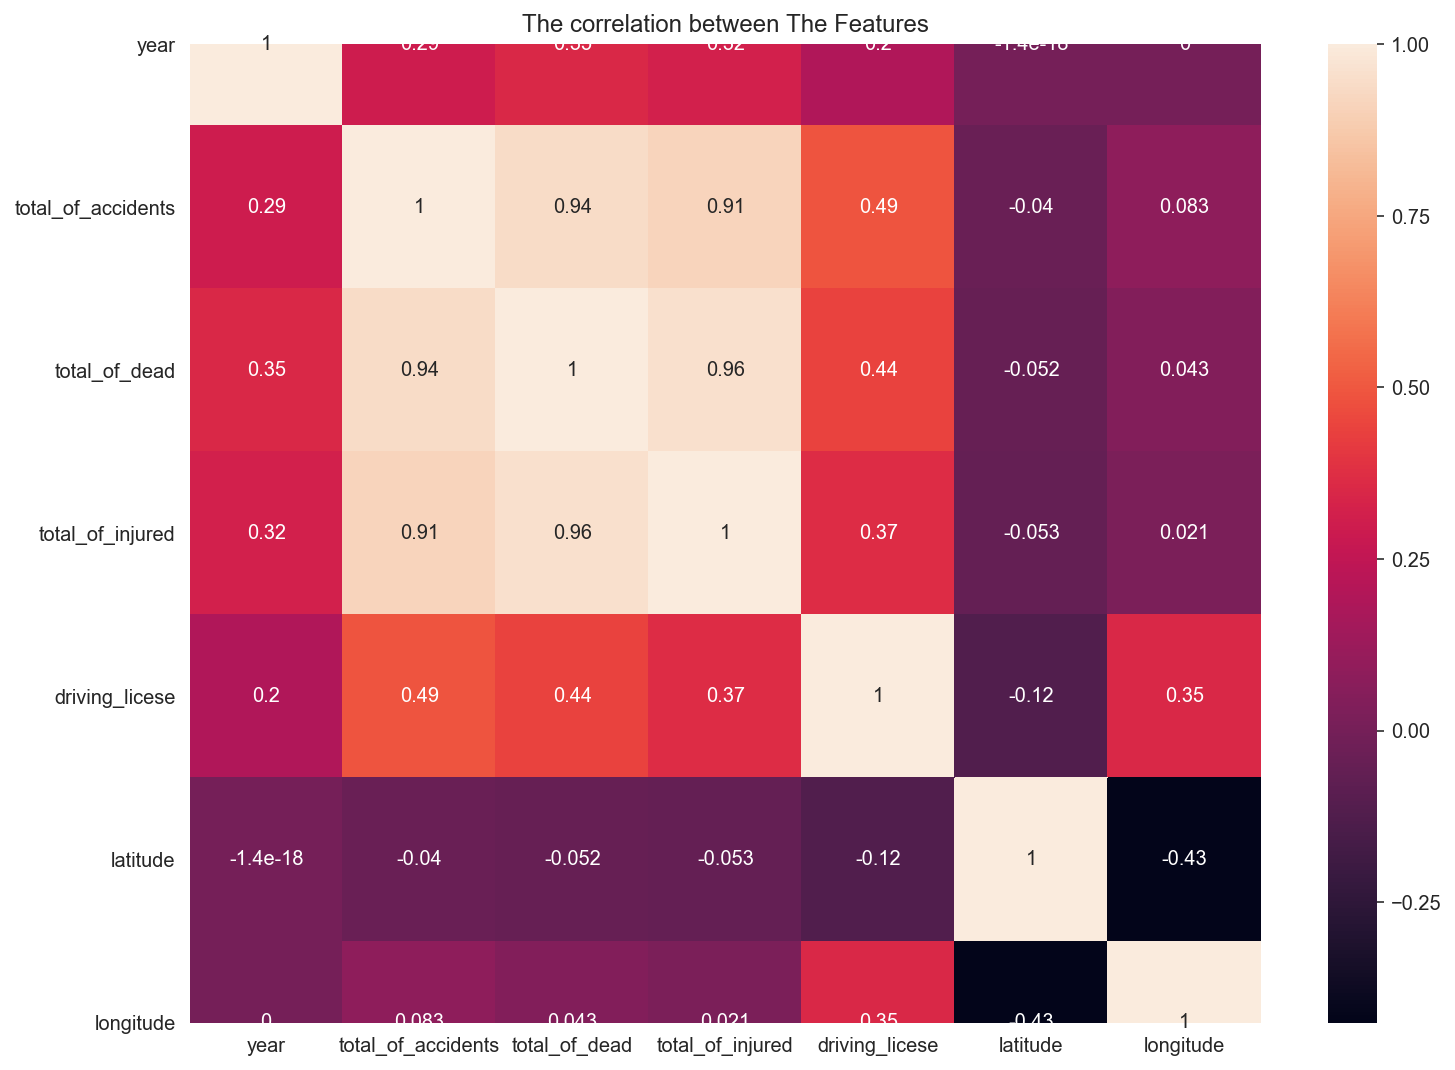

In [67]:
fig=plt.figure(figsize=(12,9))
ax = fig.gca()
sns.heatmap(marge_df.corr(), annot=True,ax=ax)
ax.set_title('The correlation between The Features')
plt.show

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [68]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(7,4)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
   
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])
  

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

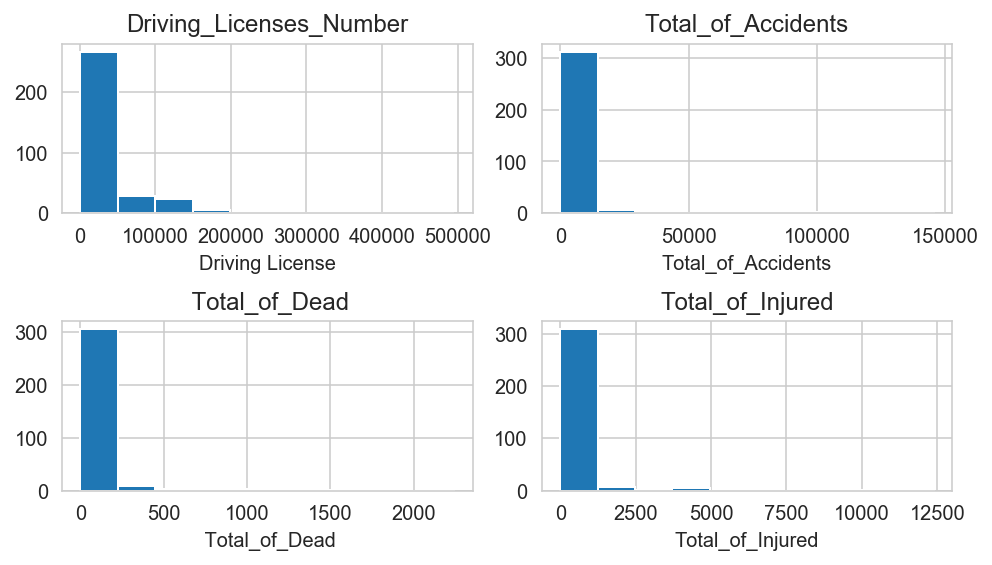

In [69]:
# Code
list_of_columns=['driving_licese','total_of_accidents','total_of_dead','total_of_injured']
list_of_xlabels=['Driving License', 'Total_of_Accidents',' Total_of_Dead','Total_of_Injured']
list_of_titles=['Driving_Licenses_Number', 'Total_of_Accidents',' Total_of_Dead','Total_of_Injured']
subplot_histograms(marge_df,list_of_columns, list_of_titles, list_of_xlabels);

plt.tight_layout()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


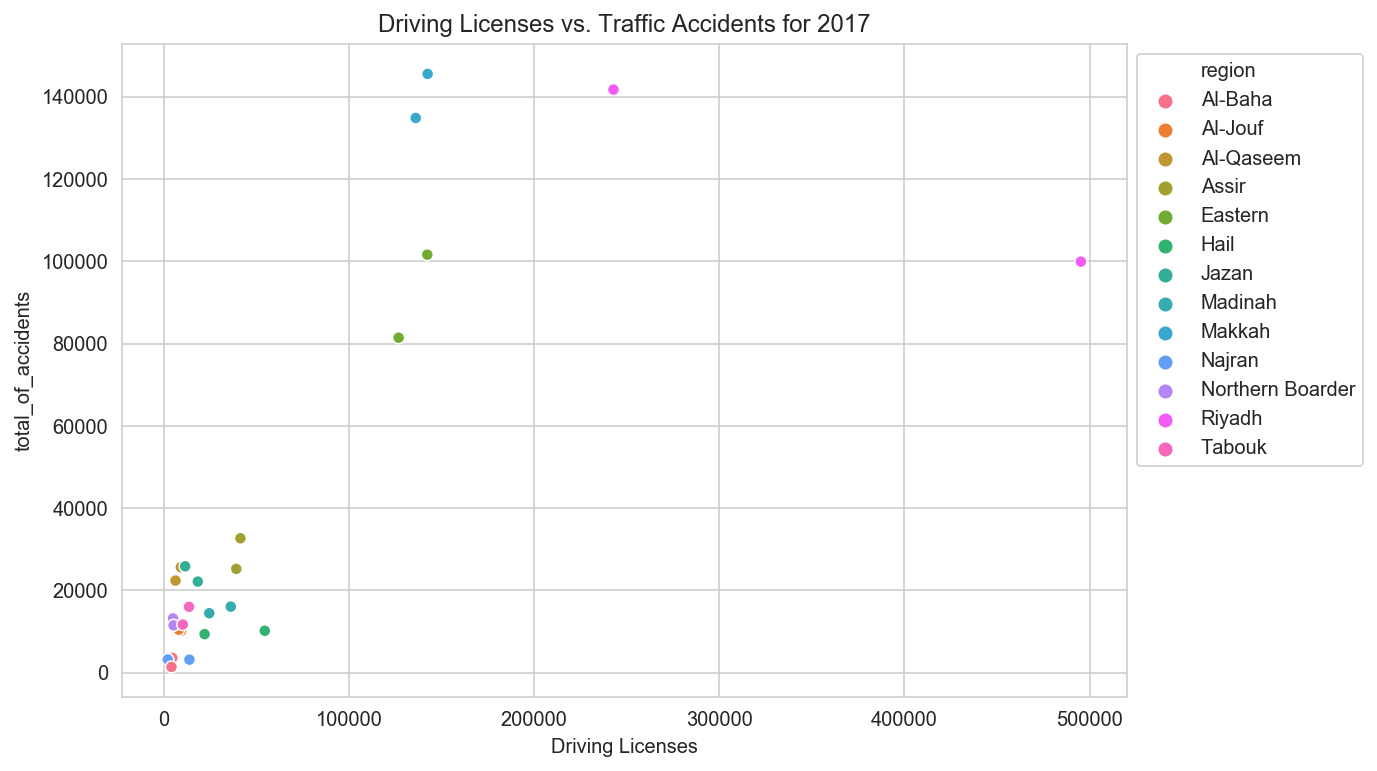

In [72]:
# Code
M=marge_inner.mask(marge_inner['year']==2017)
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
sns.scatterplot(data=marge_inner, x='driving_licese', y='total_of_accidents',hue='region')
ax.set_ylabel("total_of_accidents")
ax.set_xlabel("Driving Licenses")
ax.set_title('Driving Licenses vs. Traffic Accidents for 2017') 
plt.legend(bbox_to_anchor=(1,1), loc=2)

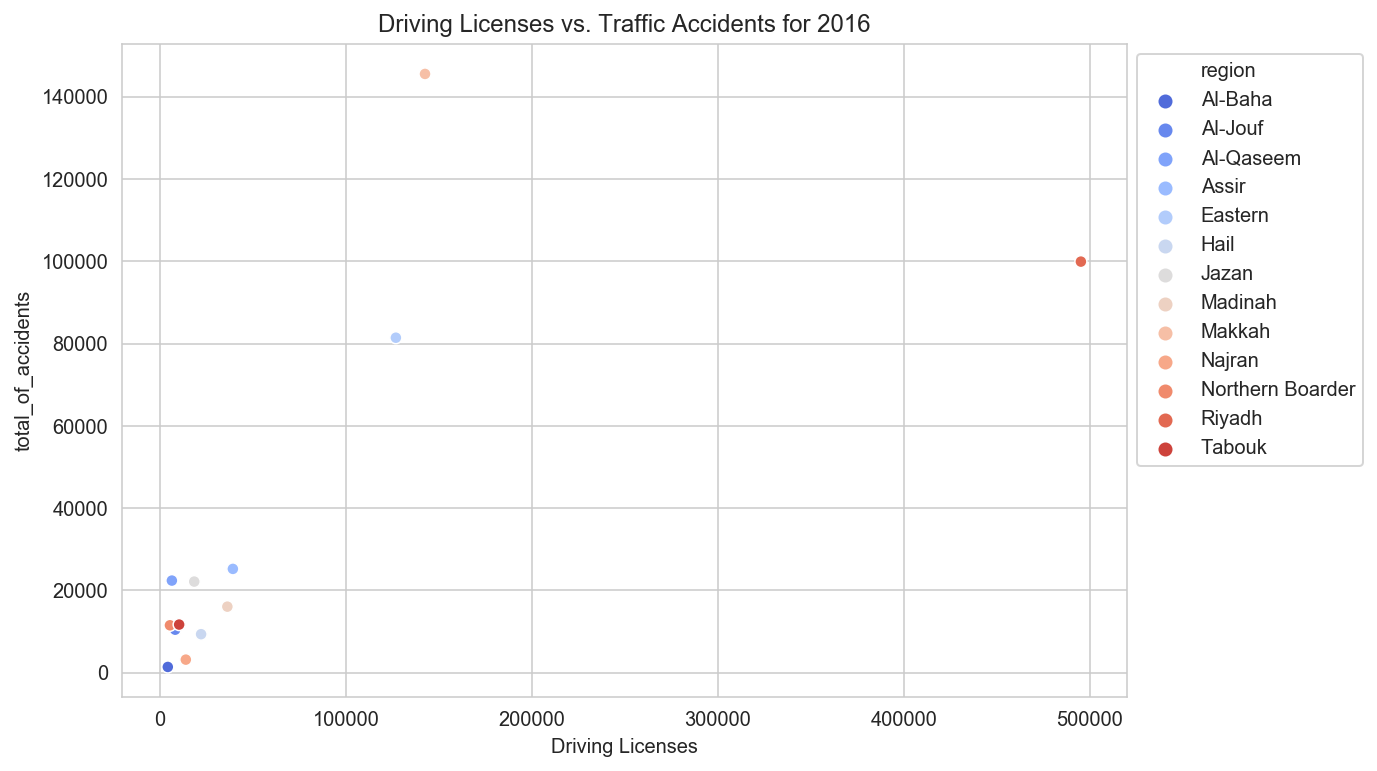

In [73]:
maskf=marge_inner.mask(marge_inner['year']==2016)
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
sns.scatterplot(data=maskf, x='driving_licese', y= 'total_of_accidents',hue='region',palette='coolwarm')
ax.set_ylabel("total_of_accidents")
ax.set_xlabel("Driving Licenses")
ax.set_title('Driving Licenses vs. Traffic Accidents for 2016')
plt.legend(bbox_to_anchor=(1,1), loc=2)

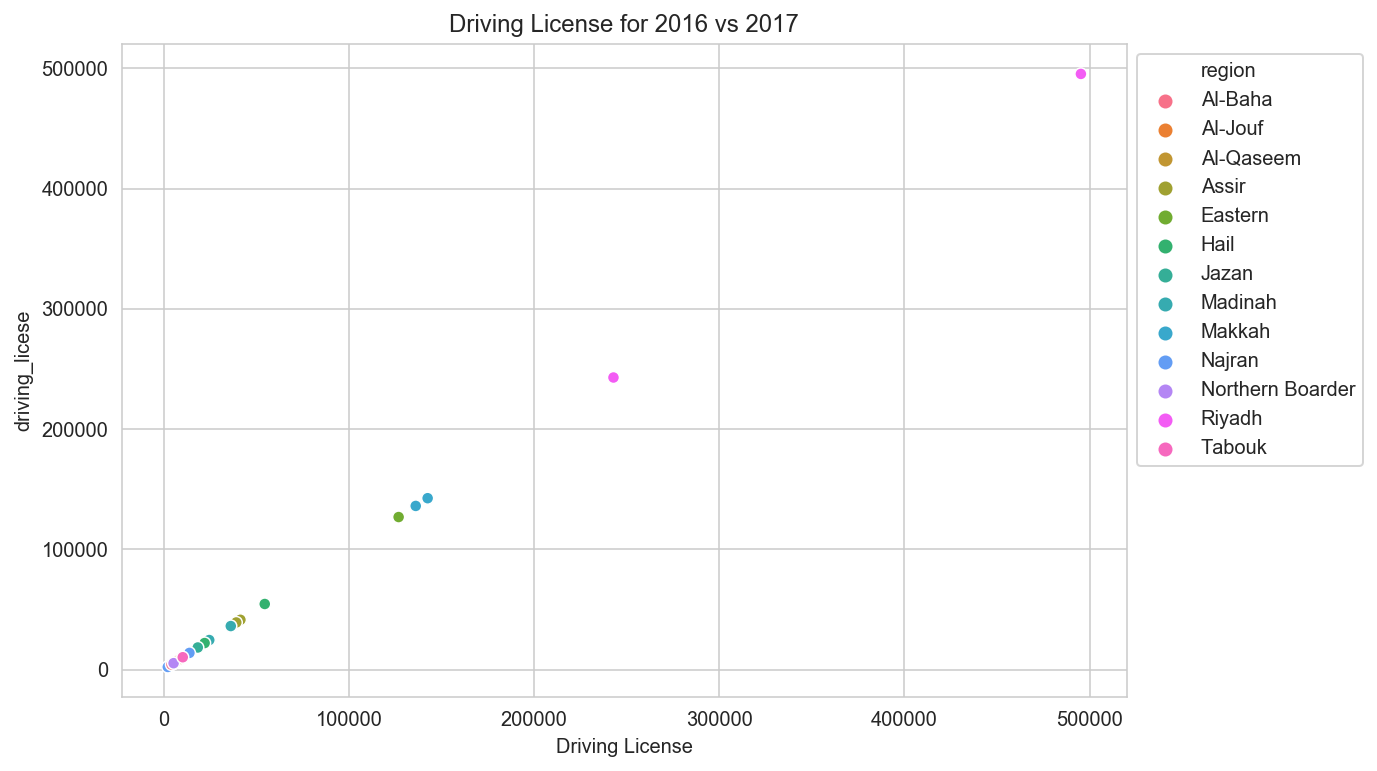

In [74]:
m3=marge_df[(marge_df['year']==2016) | (marge_df['year']==2017)]
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
sns.scatterplot(data = m3, x='driving_licese',hue='region', y= 'driving_licese')
ax.set_ylabel("driving_licese")
ax.set_xlabel("Driving License")
ax.set_title('Driving License for 2016 vs 2017')
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [76]:
driving_licese_2016 =marge_inner[marge_inner['year']==2016 ]['driving_licese']
driving_licese_2017 =marge_inner[marge_inner['year']==2017]['driving_licese']

Text(0.5, 1.0, 'Driving_licese_2016 vs 2017')

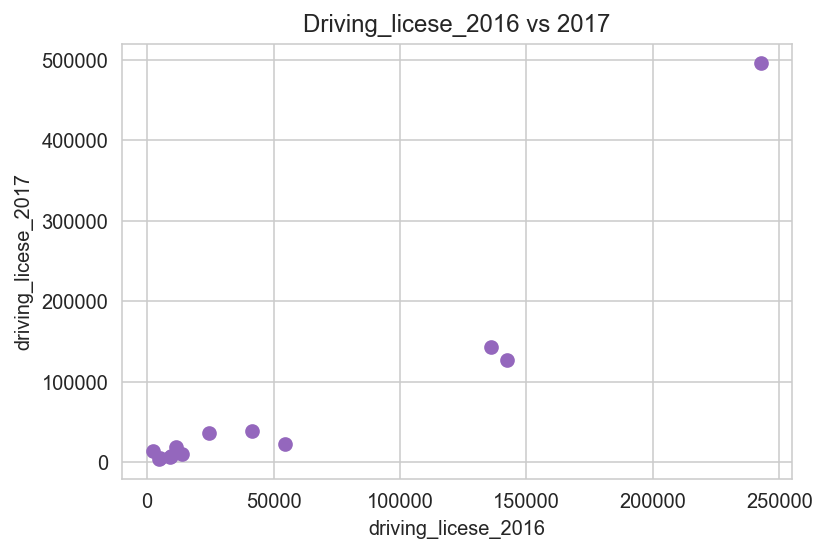

In [77]:

plt.scatter(driving_licese_2016,driving_licese_2017,s=40,c= '#9467bd')
plt.xlabel('driving_licese_2016')
plt.ylabel('driving_licese_2017')
plt.title('Driving_licese_2016 vs 2017')

Text(0.5, 1.0, 'Traffic Accidents for 2016 vs 2017')

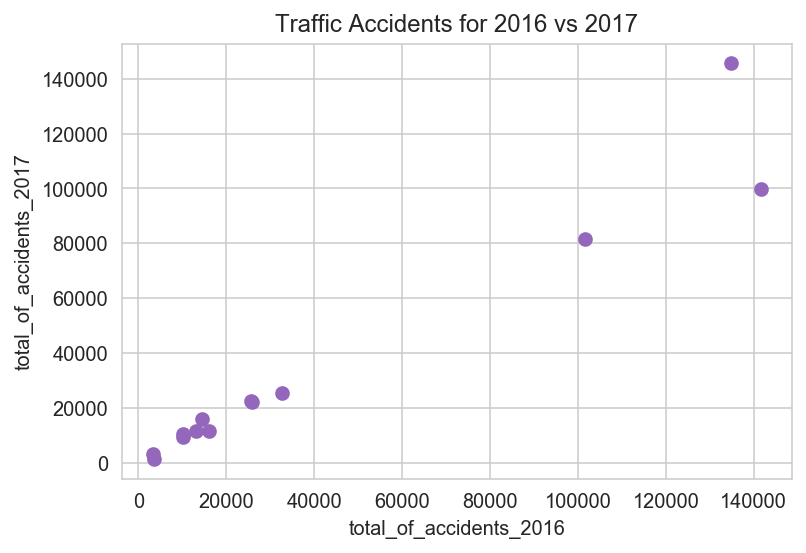

In [78]:
total_of_accidents_2016 =marge_df[marge_df['year']==2016 ]['total_of_accidents']
total_of_accidents_2017 =marge_df[marge_df['year']==2017]['total_of_accidents']

plt.scatter(total_of_accidents_2016,total_of_accidents_2017,s=40,c= '#9467bd')
plt.xlabel('total_of_accidents_2016')
plt.ylabel('total_of_accidents_2017')
plt.title('Traffic Accidents for 2016 vs 2017')


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [69]:
marge_df['total_of_injured'].unique()

array([    0,  1227,   920,  1513,  2541,  4893,   932,  2259,  4184,
       12383,   706,   631,  4207,  1724,  1007,   862,  1446,  2368,
        4073,   773,  2207,  2917, 10623,   766,   374,  4540,  1243],
      dtype=int64)

In [70]:
#marge_df['driving_licese'].unique()

In [79]:
#marge_inner.describe()

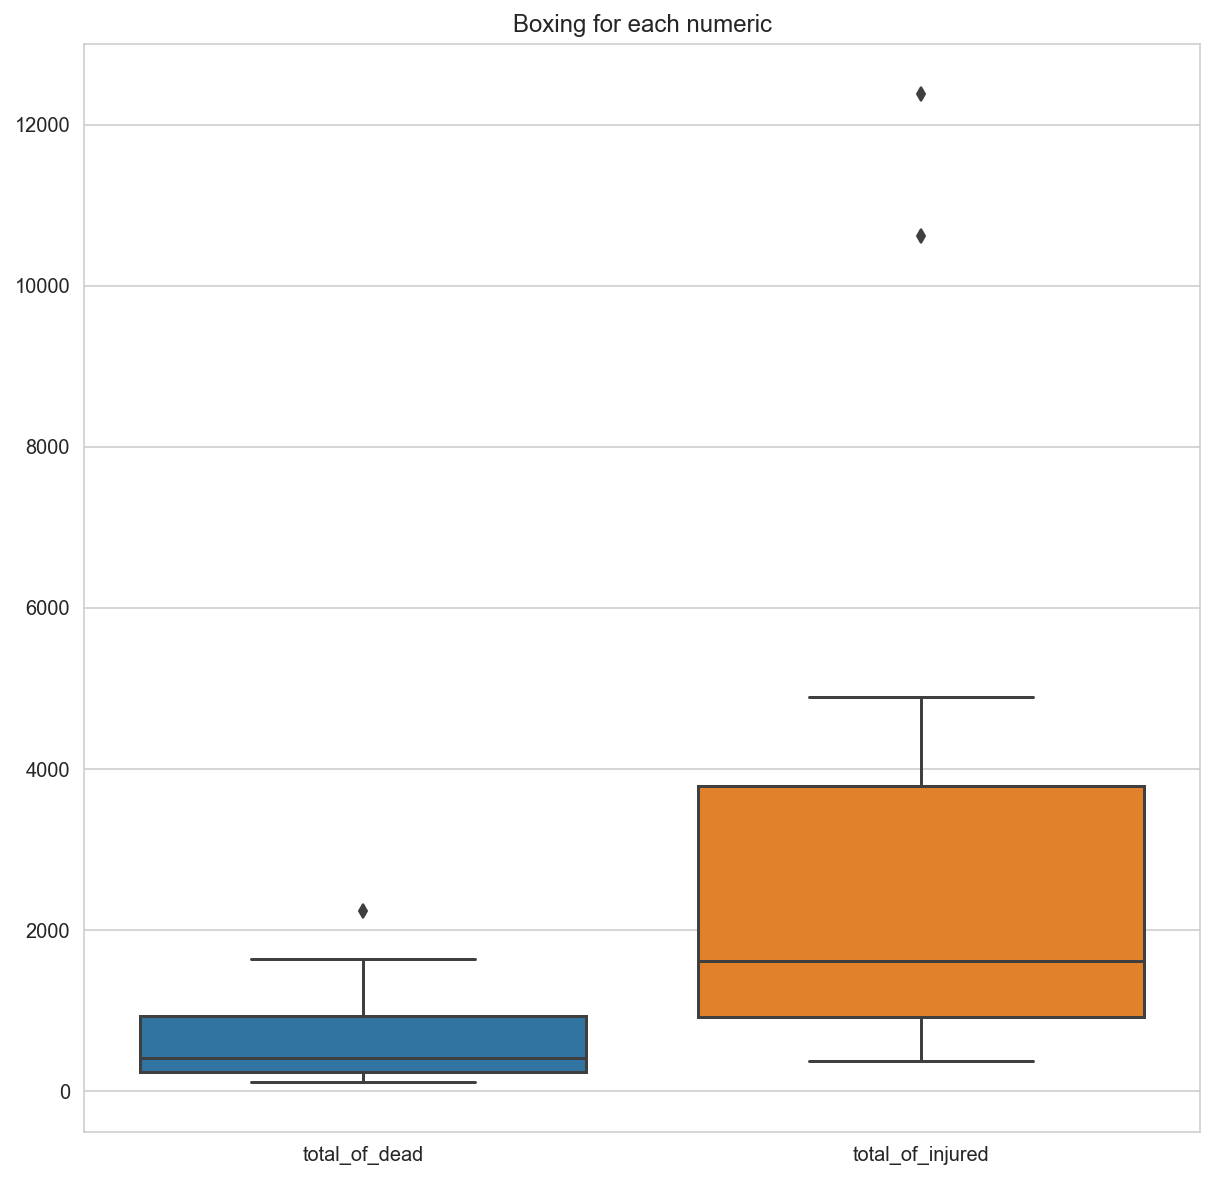

In [80]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
ax.set_title('Boxing for each numeric')
ax=sns.boxplot(data =marge_inner[['total_of_dead', 'total_of_injured']],orient='v')

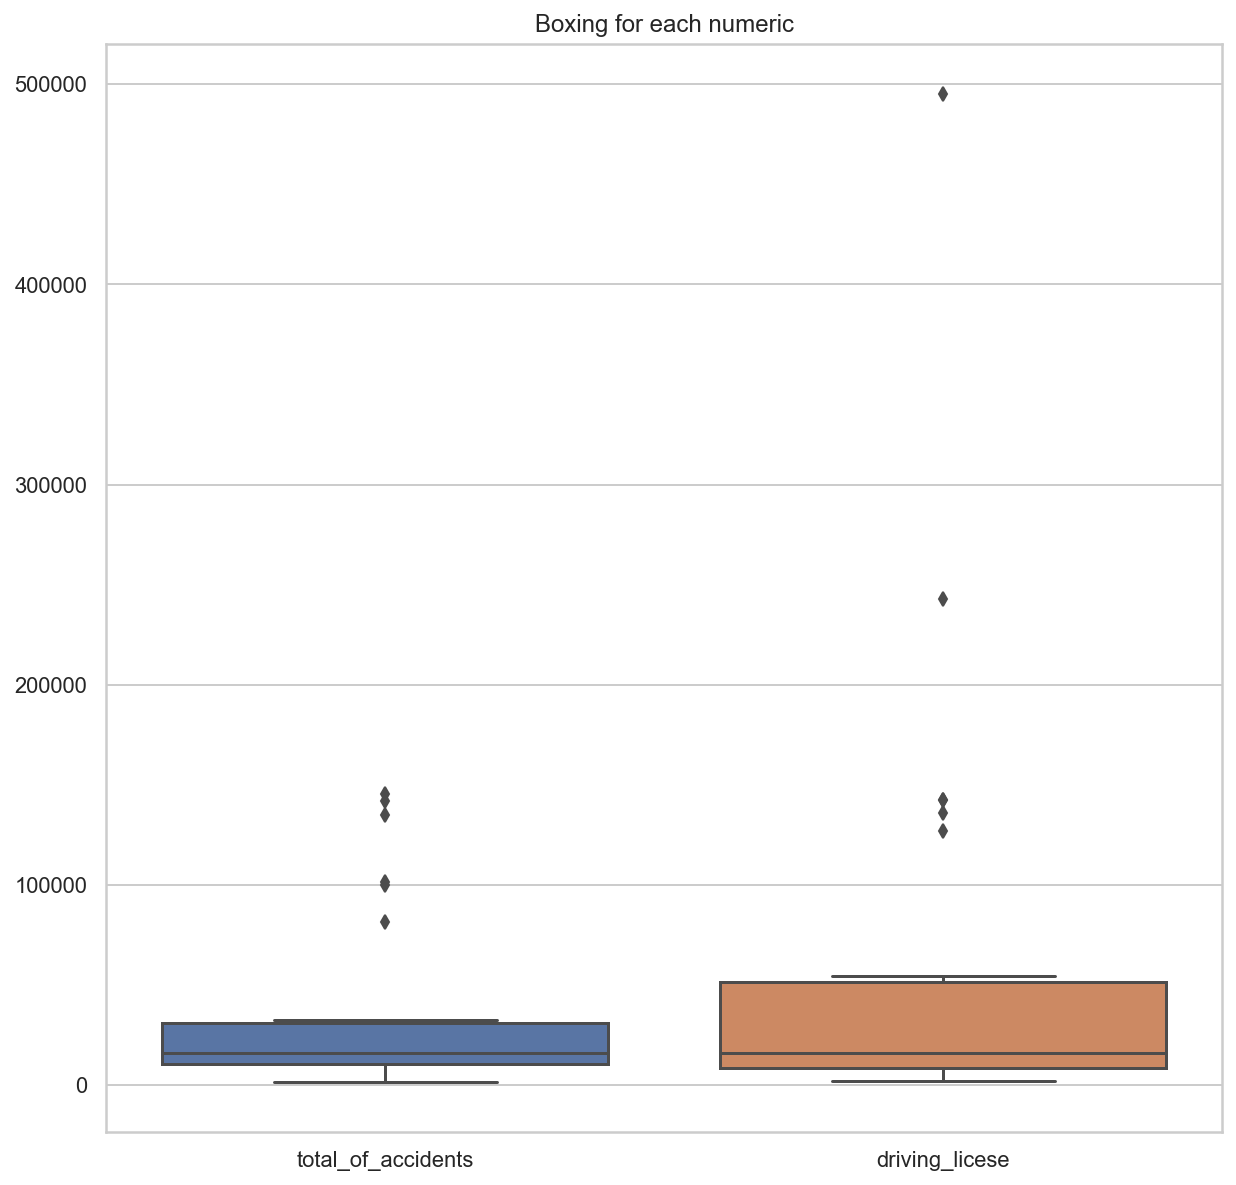

In [78]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(10,10))
ax.set_title('Boxing for each numeric')
ax=sns.boxplot(data =marge_inner[['total_of_accidents', 'driving_licese']],orient='v')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0.5, 1.0, 'Total of accidents for 2016 vs 2017')

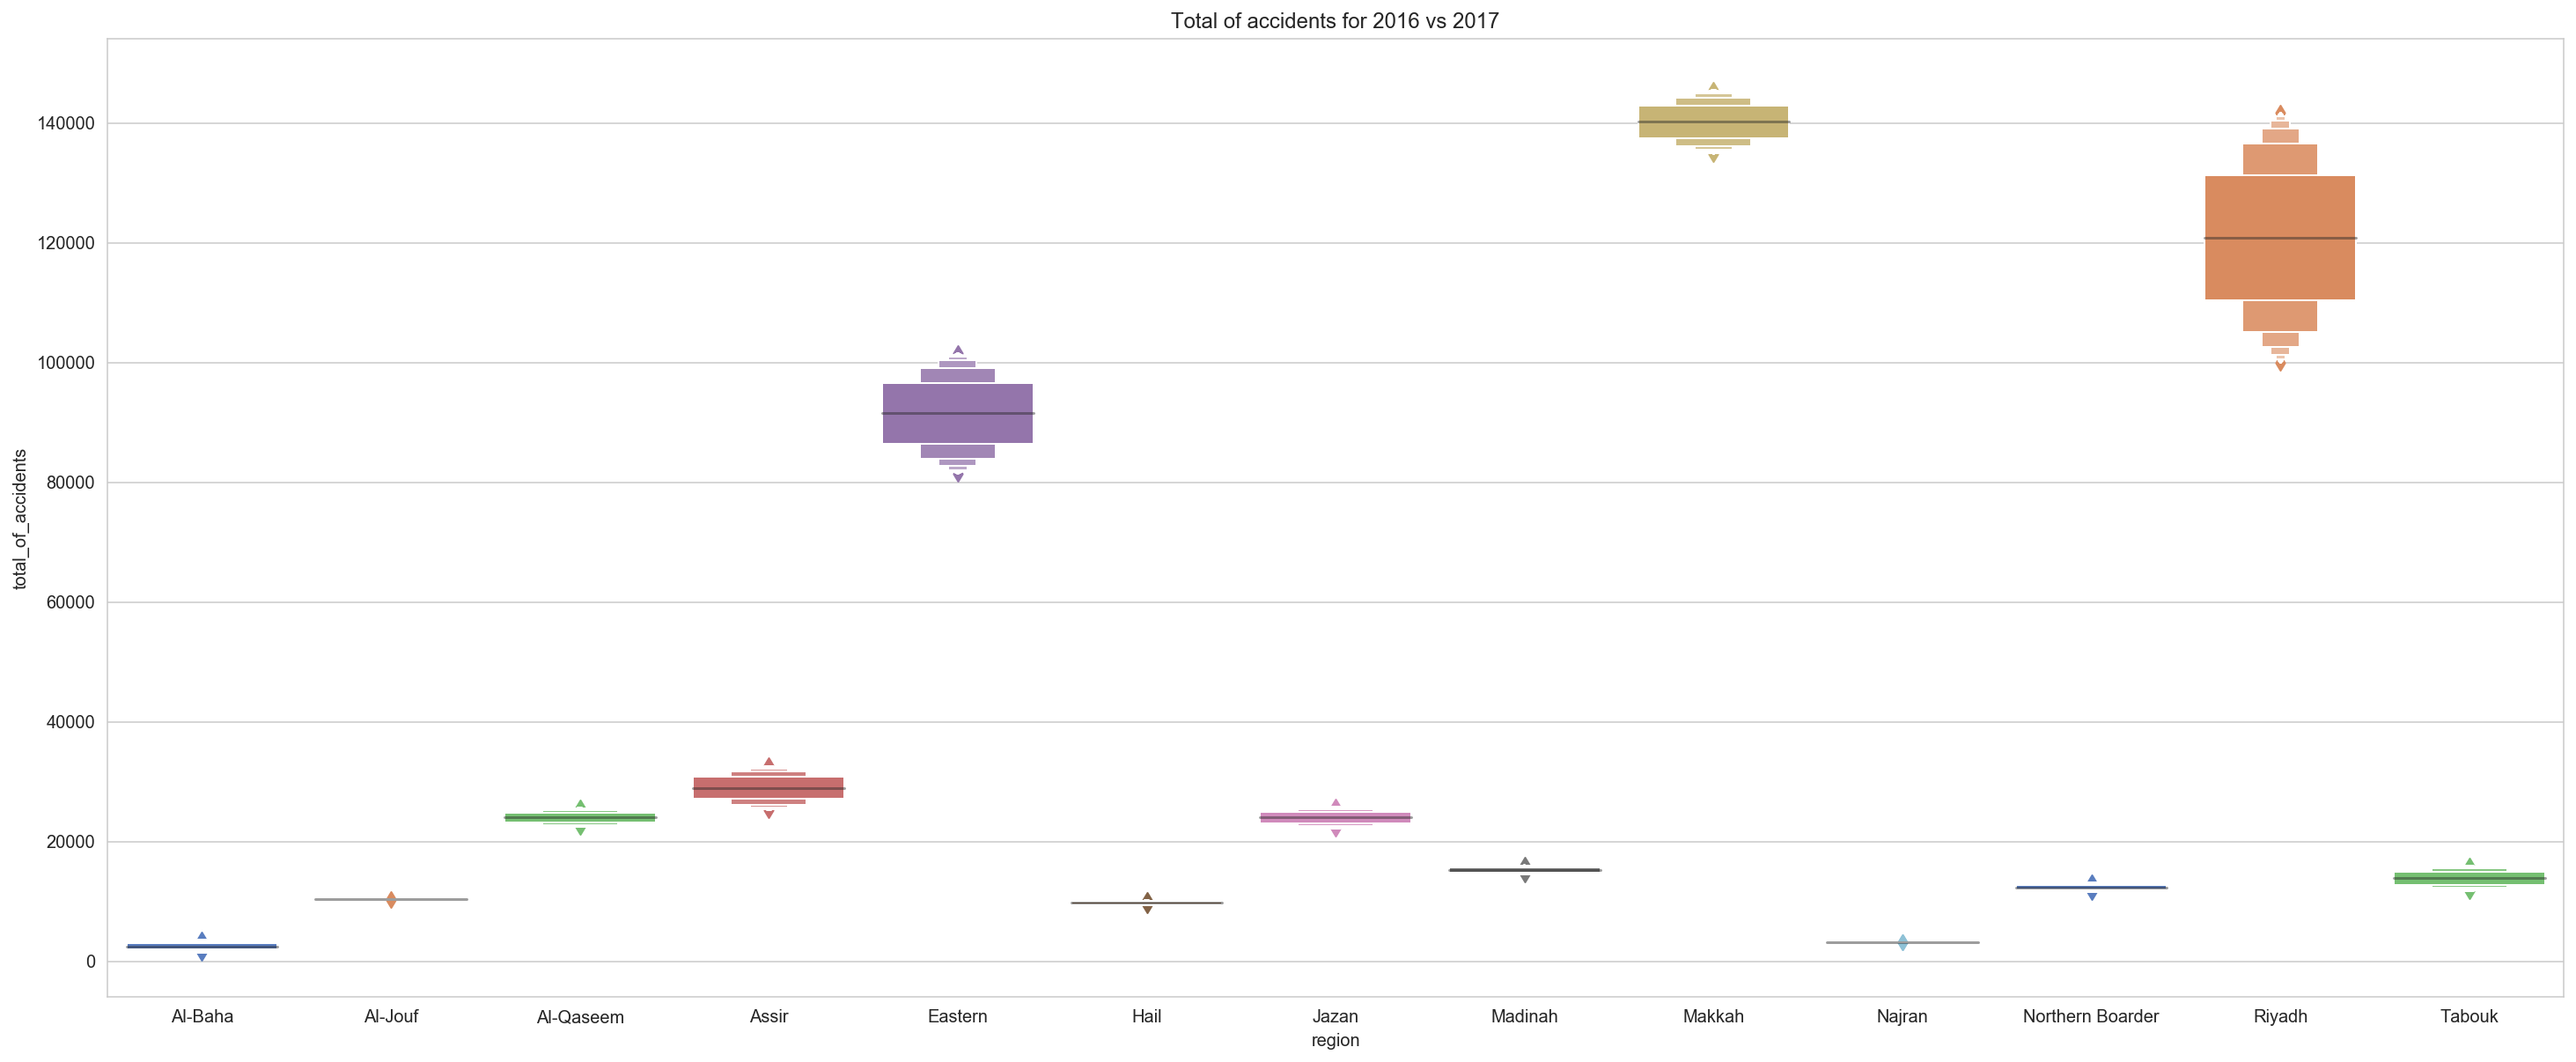

In [82]:
fig = plt.figure(figsize=(25,10))

ax = fig.gca()
sns.boxenplot(x="region", y='total_of_accidents', data=marge_inner,palette="muted",ax=ax
               )# MUTED neutrals # 2016 & 2017 
ax.set_title('Total of accidents for 2016 vs 2017')

Text(0.5, 1.0, 'Driving Licenses for 2016 vs 2017')

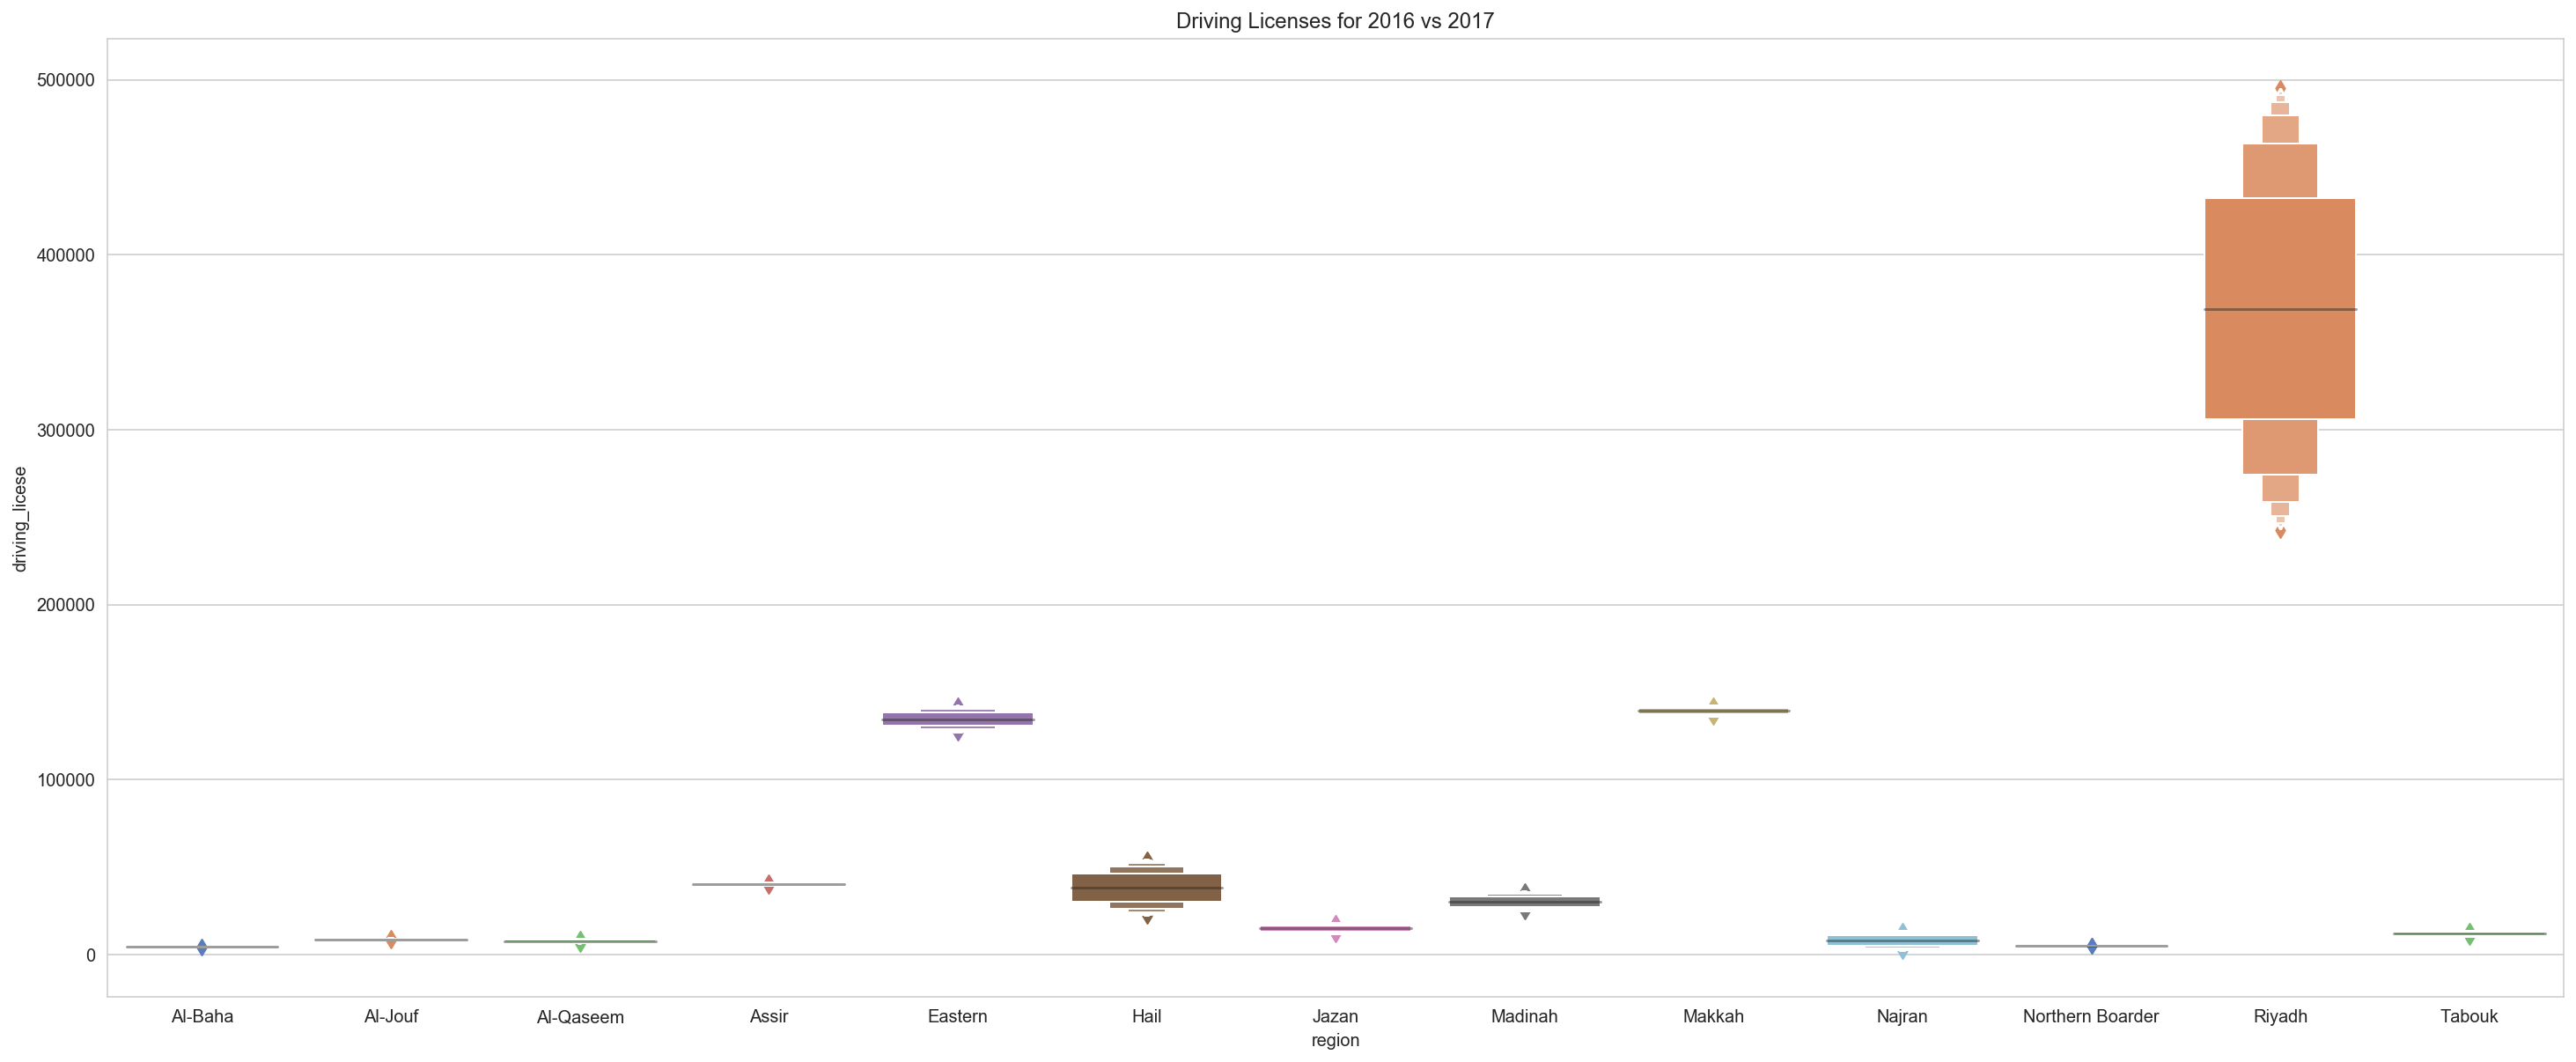

In [84]:
fig = plt.figure(figsize=(25,10))

ax = fig.gca()
sns.boxenplot(x="region", y="driving_licese", data=marge_inner,palette="muted",ax=ax
               )# MUTED neutrals # 2016 & 2017 
ax.set_title('Driving Licenses for 2016 vs 2017')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [85]:
marge_inner.describe()

,year,total_of_accidents,total_of_dead,total_of_injured,driving_licese,latitude,longitude
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2016.500000,38225.692308,635.384615,2743.038462,62507.000000,23.810447,42.602789
std,0.509902,46493.705035,549.783381,2922.641127,107293.917762,4.274533,3.313532
min,2016.000000,1414.000000,112.000000,374.000000,2153.000000,17.207231,37.259858
25%,2016.000000,10276.250000,241.250000,923.000000,8363.250000,20.148406,41.263690
50%,2016.500000,16050.500000,415.500000,1618.500000,16085.000000,23.288331,41.817119
75%,2017.000000,30981.250000,929.250000,3784.000000,51222.000000,27.400846,43.343000
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,30.197075,50.147830


Answers:

total_of_accidents (mean > median ) Right (positive ) skwed distribition 

total_of_dead ( mean (635) medain (415))  Right (positive ) skwed distribition .

total_of_injured (mean (2743)> median (2743)) Right skwed (positive )distribition
driving_licese (mean (62507)> median (16085)) Right skwed (positive )distribition


In general, my data is a  Right (positive ) skwed distribition .
The variance is the average of the distances from the mean squared ,and it show when we calculated that is very high and that means that the data points are very spread out from the mean ,and from one another .

the standard deviation tells us approximately, on average, the distance of numbers in a distribution from the mean of the distributio

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

NO,all  my data is right positive  skweed distribution.

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Driving License, Having Right (positive ) skwed distribition by driving_licese and that affect on my data in marage.

In [102]:
#df_licenses.describe()

Traffic Accidents , Having Right (positive ) skwed distribition by total_of_accidents, total_of_injured,and total_of_dead, and that affect my data.

In [103]:
#table_pivot.describe()

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [96]:
# calculate the means of the samples, and return the sample means as a new list .
def sampling(population,o,k):
    sampling_means=[]
    for i in range(k):
        sample = np.random.choice(population,size=o,replace=True)
        sampling_means.append(np.mean(sample))
        return sampling_means

Text(0.5, 1.0, 'distribution of the total_of_injured')

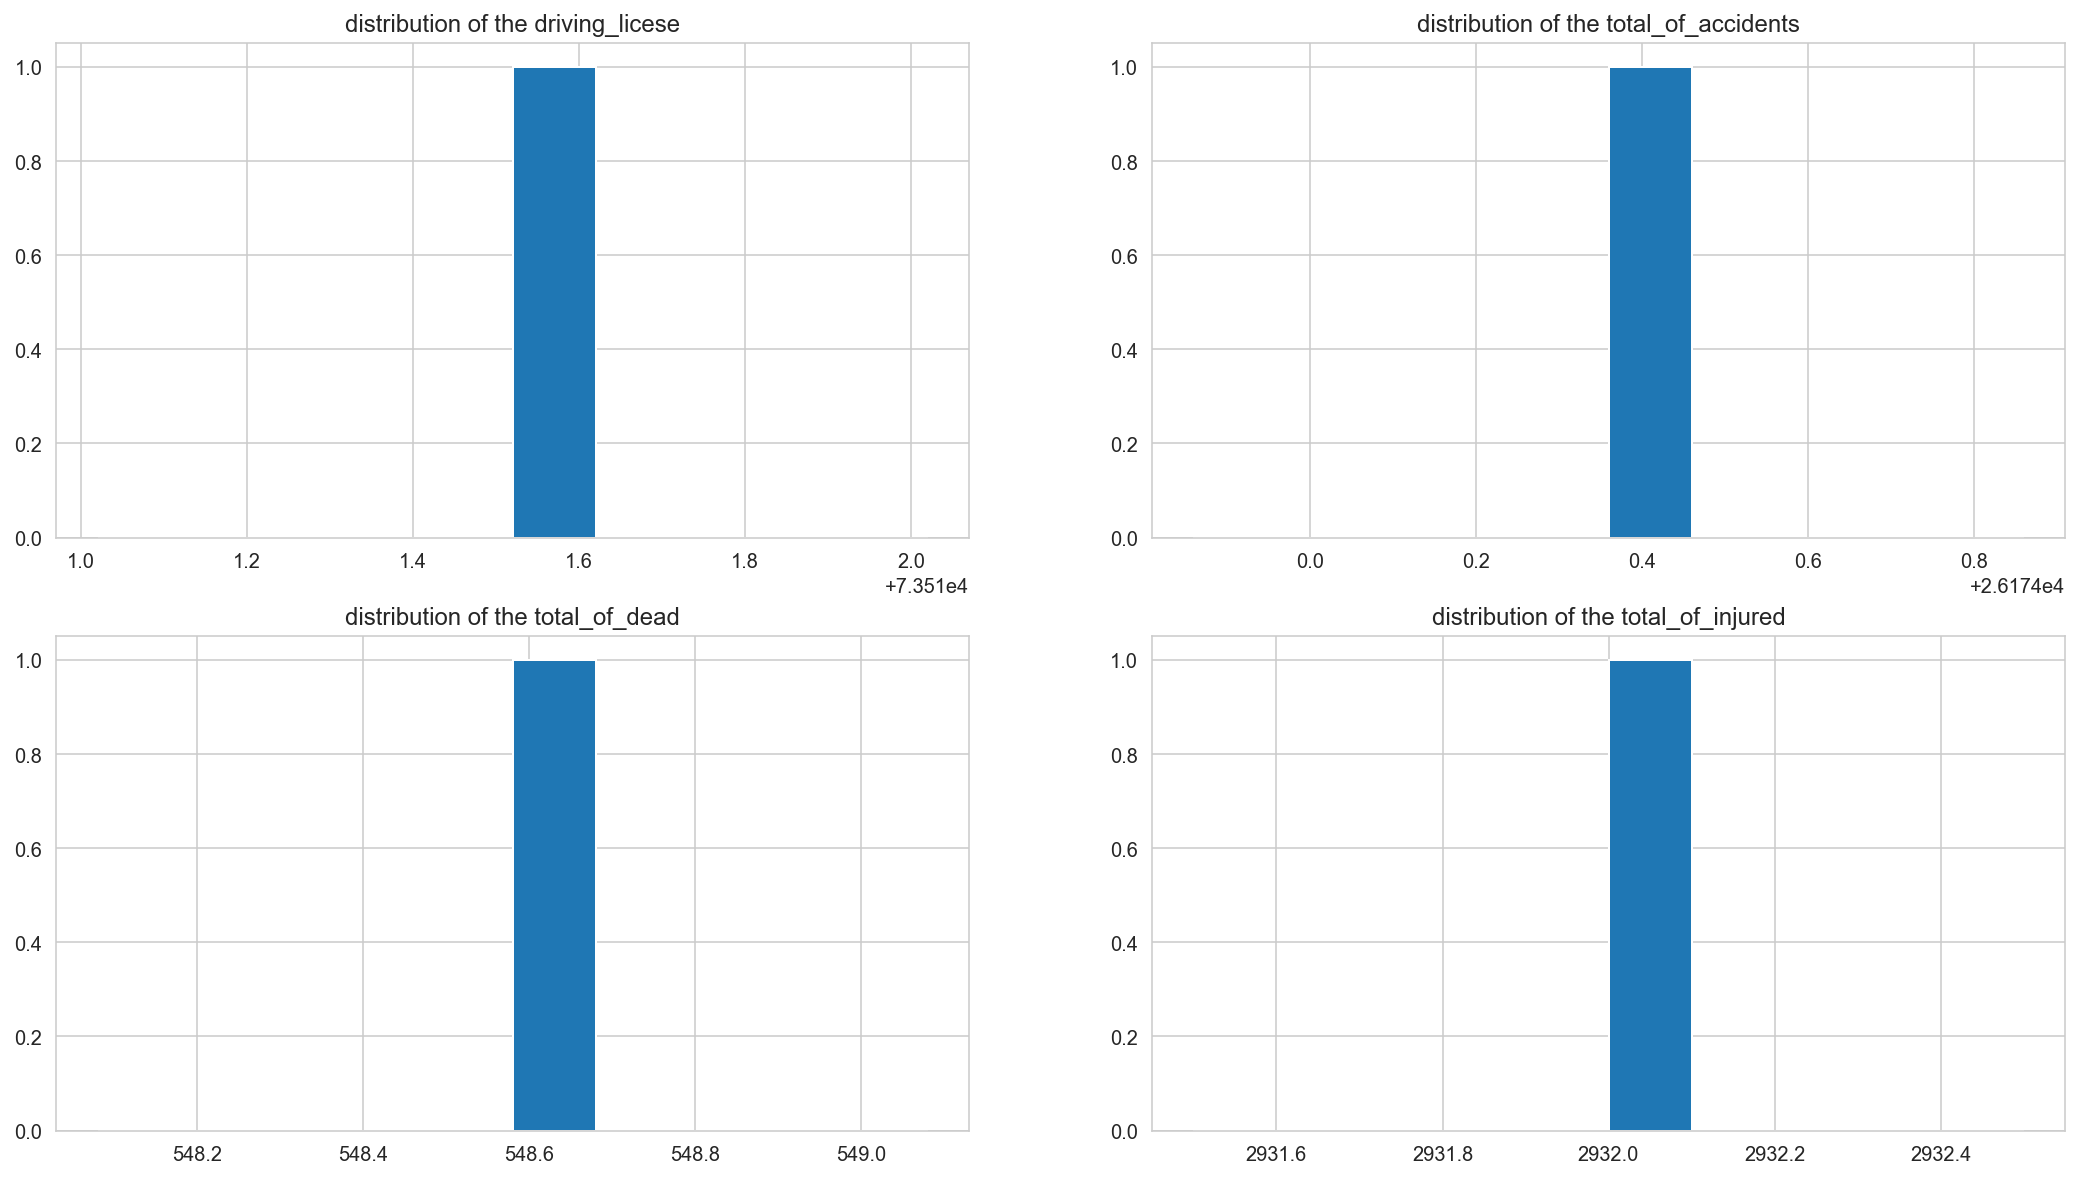

In [95]:
fig,ax = plt.subplots(nrows = 2, ncols = 2, figsize=(18,10))

distribution=sampling(marge_inner.driving_licese,o=50,k=500)
ax[0,0].hist(distribution);
ax[0,0].set_title('distribution of the driving_licese')


distribution=sampling(marge_inner.total_of_accidents,o=50,k=500)
ax[0,1].hist(distribution);
ax[0,1].set_title('distribution of the total_of_accidents')


distribution=sampling(marge_inner.total_of_dead,o=50,k=500)
ax[1,0].hist(distribution);
ax[1,0].set_title('distribution of the total_of_dead')

distribution=sampling(marge_inner.total_of_injured,o=50,k=500)
ax[1,1].hist(distribution);
ax[1,1].set_title('distribution of the total_of_injured')


#ax.hist(means_1)

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

Text(0.5, 1.0, 'Driving Licenses for region')

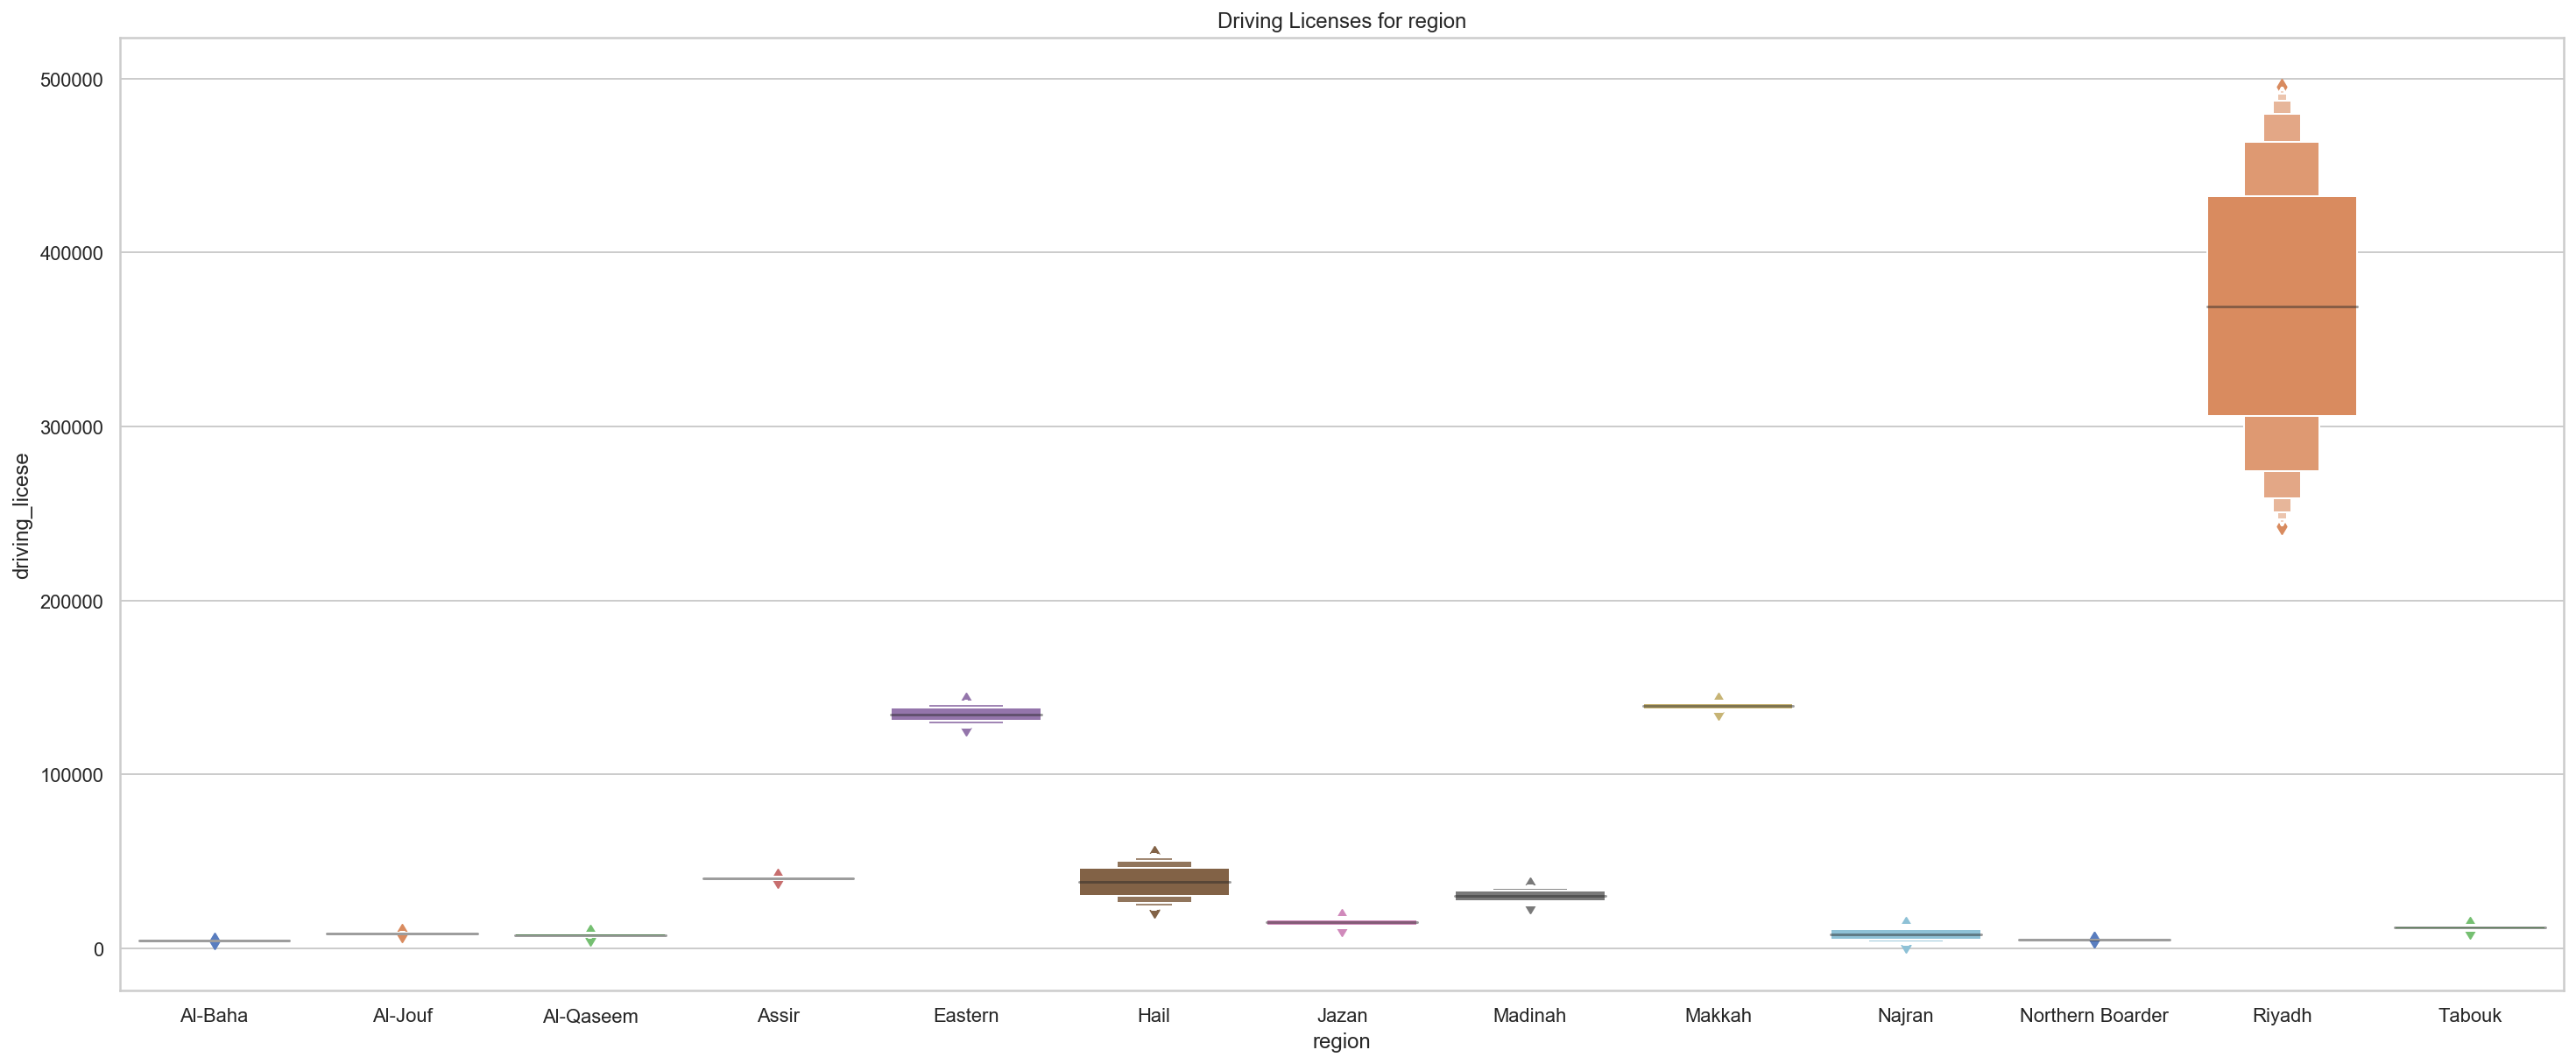

In [120]:
fig = plt.figure(figsize=(25,10))

ax = fig.gca()
sns.boxenplot(x="region", y="driving_licese", data=marge_inner,palette="muted",ax=ax
               )# MUTED neutrals 
ax.set_title('Driving Licenses for region')

During the chart a bove , i can decide the higest regions have driving licese in saudy arbia is Riyadh , makkah and  Eastern.
Actually,there are many reason make this happend:-
first, Riyadh is a capital city that have  a lot of licenses and vehicles because it has a huge population in it and the business as well.Than, makkah is holiest city and receives a lot of visiter and  pilgrims by a billion.This requires more transport services.in the end,Eastern area has high percentage of licenses because they do not have public transport and this invites every individual  or  family to have a private car. 

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

Answer:

I prescribed to give a Severe law authorization of petty criminal offenses so it can exceptionally influence the complete number of accident and henceforth decline the quantities of injured and dead Additionally awareness social campaigns that showcase that injuries and deaths caused by by criminal traffic.It is necessary to remind individuals that they should comply with the guidelines and respect the road and the other drives to avoid any lossoffense